In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
df = pd.read_csv('spill_incidents.csv')

/Users/areena.arora/.pyenv/versions/3.10.0/lib/python3.10/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [2]:
df.columns = df.columns.str.lower()
df.columns = df.columns.str.replace(" ", "_")
# .str.replace("-", "_").str.replace("(", "").str.replace(")", "")

In [3]:
df.head(3)

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
0,107132,MH 864,RT 119/MILLWOOD RD,NaN,ELMSFORD,Westchester,NaN,6000,3,10/10/2001,10/10/2001,Unknown,NaN,Unknown,10/15/2001,unknown material,Other,10.0,Gallons,0.0
1,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,Pounds,0.0
2,405586,BOWRY BAY,WATER POLL CONTROL,NaN,QUEENS,Queens,NaN,4101,2,08/21/2004,08/21/2004,Other,EAST RIVER,Unknown,09/17/2004,raw sewage,Other,0.0,NaN,0.0


In [45]:
queens_incidents = df.loc[df.county == 'Queens'].sort_values(by='quantity', ascending=False).head(20)
queens_incidents

,spill_number,program_facility_name,street_1,street_2,locality,county,zip_code,swis_code,dec_region,spill_date,received_date,contributing_factor,waterbody,source,close_date,material_name,material_family,quantity,units,recovered
454155,9901392,TALLMAN ISLAND REGULATOR,57,NaN,NEW YORK CITY,Queens,NaN,4101,2,05/05/1999,05/05/1999,Unknown,FLUSHING RIVER,"Major Facility (MOSF) > 400,000 gal",09/08/1999,raw sewage,Other,103000000.0,Gallons,0.0
215478,510256,JAMACIA WATER PLANT,150-20 134TH STREET,NaN,JAMAICA,Queens,NaN,4101,2,11/30/2005,11/30/2005,Equipment Failure,JAMACIA BAY,Commercial/Industrial,11/30/2005,raw sewage,Other,60000000.0,Gallons,0.0
31851,2107352,AIRPORT - ALLIED AVIATION,90 SOUTH SERVICE RD.,NaN,JAMAICA,Queens,NaN,4101,2,11/09/2021,11/09/2021,Other,NaN,Airport/Aircraft,11/09/2021,jet fuel,Petroleum,3416000.0,Gallons,0.0
65831,606653,BOWERY BAY,4301BERRIAN BLVD,NaN,QUEENS,Queens,NaN,4101,2,09/10/2006,09/10/2006,Other,EAST RIVER,Commercial/Industrial,09/11/2006,raw sewage,Other,2000000.0,Gallons,0.0
137588,506141,EAST RIVER,31-03 20TH AVENUE,NaN,ASTORIA,Queens,NaN,4101,2,08/18/2005,08/18/2005,Tank Failure,NaN,Unknown,08/18/2005,#6 fuel oil,Petroleum,2000000.0,Gallons,0.0
154425,9903856,FLUSHING BAY,BOWERY BAY HIGH LEVEL 8,REGULATOR 108/37 AVE,NaN,Queens,NaN,4101,2,07/04/1999,07/04/1999,Housekeeping,FLUSHING BAY,"Institutional, Educational, Gov., Other",02/04/2003,raw sewage,Other,750000.0,Gallons,0.0
454210,9607212,TALLMANS ISLAND REG #57,41ST AVE & LAWRENCE ST,NaN,FLUSHING,Queens,NaN,4101,2,09/06/1996,09/07/1996,Equipment Failure,FLUSHING BAY,Commercial/Industrial,09/09/1996,raw sewage,Other,750000.0,Gallons,0.0
304026,1010852,NRG ASTORIA GAS,31-01 20TH AVE,NaN,ASTORIA,Queens,NaN,4101,2,01/24/2011,01/24/2011,Equipment Failure,NaN,Commercial/Industrial,08/10/2011,kerosene,Petroleum,736000.0,Gallons,0.0
242346,9712740,LINDEN PLACE PUMP STATION,LINDEN PL,NaN,QUEENS,Queens,NaN,4101,2,02/13/1998,02/14/1998,Equipment Failure,FLUSHING BAY,Commercial/Industrial,02/17/1998,raw sewage,Other,727000.0,Gallons,0.0
65798,402872,BOWERY BAY WPCP DEP -DDC,43-01 BERRIAN BOULEVARD,NaN,QUEENS,Queens,NaN,4101,2,06/15/2004,06/15/2004,Equipment Failure,NaN,"Major Facility (MOSF) > 400,000 gal",06/16/2004,raw sewage,Other,500000.0,Gallons,0.0


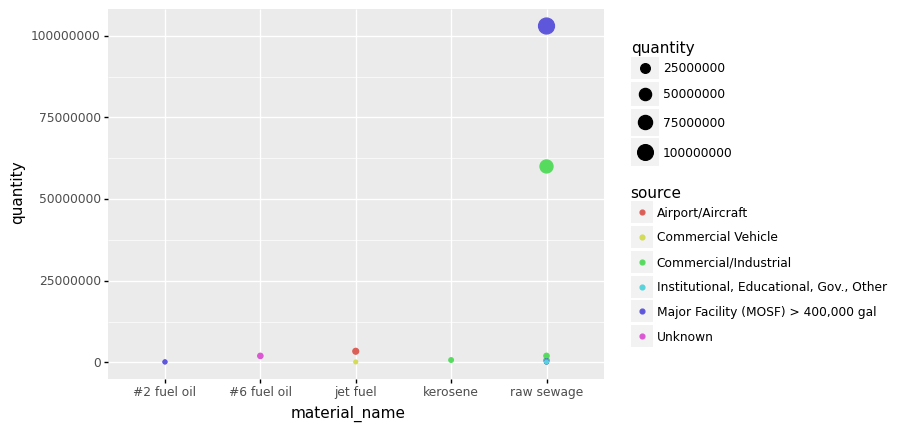

<ggplot: (678005190)>

In [46]:
from plotnine import*
ggplot(queens_incidents, aes(x='material_name', y='quantity', color='source'))+geom_point(aes(size = 'quantity'))

In [4]:
df.contributing_factor.value_counts()

Equipment Failure                           191962
Unknown                                      93688
Other                                        54101
Human Error                                  34274
Traffic Accident                             30668
Tank Test Failure                            28394
Tank Failure                                 22221
Deliberate                                   22098
Housekeeping                                 16410
Tank Overfill                                11124
Abandoned Drums                               8675
Storm                                         8173
Vandalism                                     1810
Missing Code in Old Data - Must be fixed       157
Name: contributing_factor, dtype: int64

In [5]:
df.sort_values(['locality', 'spill_date']).groupby(level=0).head(3)

In [ ]:
df.groupby(by='county').contributing_factor.value_counts()

In [ ]:
df.loc[df.contributing_factor == 'Human Error'].groupby(by='county').count()

In [ ]:
df.loc[df.county == 'Shinnecock Indian Reservation']

In [ ]:
df.loc[df.contributing_factor == 'Abandoned Drums']

In [ ]:
df.loc[df.contributing_factor == 'Abandoned Drums'].sort_values(by='quantity', ascending=False)

In [ ]:
df.dtypes

In [ ]:
df.loc[df.contributing_factor == 'Abandoned Drums'].sort_values(by='quantity', ascending=False)

In [ ]:
df.waterbody.value_counts()

In [ ]:
df['spill_date'] = pd.to_datetime(df.spill_date, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
df['close_date'] = pd.to_datetime(df.close_date, format="%m/%d/%Y %I:%M:%S %p", errors='coerce')
df.head()

In [ ]:
df.dtypes

Questions to ask of the data:
1. Where did the most incidents occur?
2. What's the most common type of material spilled?
3. What's the biggest quantity of spill?
4. What are the biggest spills by each county?
5. Shortest clean up time
6. Longest clean up time
7. Most common and least common source of spills

### Where did the most incidents occur?

In [ ]:
df.county.value_counts().head(5)

In [ ]:
df['county'].value_counts().groupby(by='contributing_factor')